In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

!mkdir '/root/.kaggle'
!cp 'kaggle.json' '/root/.kaggle'
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets list -s credit

ref                                                        title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sakshigoyal7/credit-card-customers                         Credit Card customers                         387771  2020-11-19 07:38:44.677000          95061       2430  1.0              
mlg-ulb/creditcardfraud                                    Credit Card Fraud Detection                 69155672  2018-03-23 01:17:27.913000         627368      12839  0.85294116       
rikdifos/credit-card-approval-prediction                   Credit Card Approval Prediction              5578875  2020-03-24 10:04:48.753000          62054        914  1.0              
parisrohan/credit-score-classification                     Credit score cla

In [ ]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 709MB/s]


In [ ]:
!unzip "credit-card-approval-prediction.zip" -d "credit-card-datasets"

Archive:  credit-card-approval-prediction.zip
  inflating: credit-card-datasets/application_record.csv  
  inflating: credit-card-datasets/credit_record.csv  


# Finding Data insight

In [ ]:
import pandas as pd

In [ ]:
df_app = pd.read_csv("credit-card-datasets/application_record.csv")
df_rec = pd.read_csv("credit-card-datasets/credit_record.csv")

In [ ]:
df_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [ ]:
df_rec.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
df_app.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
print(df_app.shape)

(438557, 18)


In [ ]:
df_rec["STATUS"].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [ ]:
df_rec["Target"] = ~df_rec["STATUS"].isin(['X','C','0'])
print(df_rec["ID"].nunique(), df_rec["ID"].shape[0])
# Duplicate id is in ID columns

45985 1048575


In [ ]:
df_rec_unique_id = df_rec.sort_values(["ID", "MONTHS_BALANCE"], ascending=False).drop_duplicates(subset=["ID"], keep="first")
print(df_rec_unique_id["ID"].nunique(), df_rec_unique_id["ID"].shape[0])

45985 45985


In [ ]:
df_data = pd.merge(df_app, df_rec_unique_id, on="ID", how="inner").drop(columns=["MONTHS_BALANCE","STATUS", "ID"])

In [ ]:
df_data.drop(columns=["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CODE_GENDER"], inplace=True)

In [ ]:
df_data

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,False
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,False
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,False
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,False
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2.0,True
36453,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2.0,False
36454,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2.0,False
36455,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2.0,True


In [ ]:
df_app["ID"].nunique()

438510

In [ ]:
df_data["CNT_FAM_MEMBERS"].value_counts()

,count
CNT_FAM_MEMBERS,
2.0,19463
1.0,6987
3.0,6421
4.0,3106
5.0,397
6.0,58
7.0,19
15.0,3
9.0,2


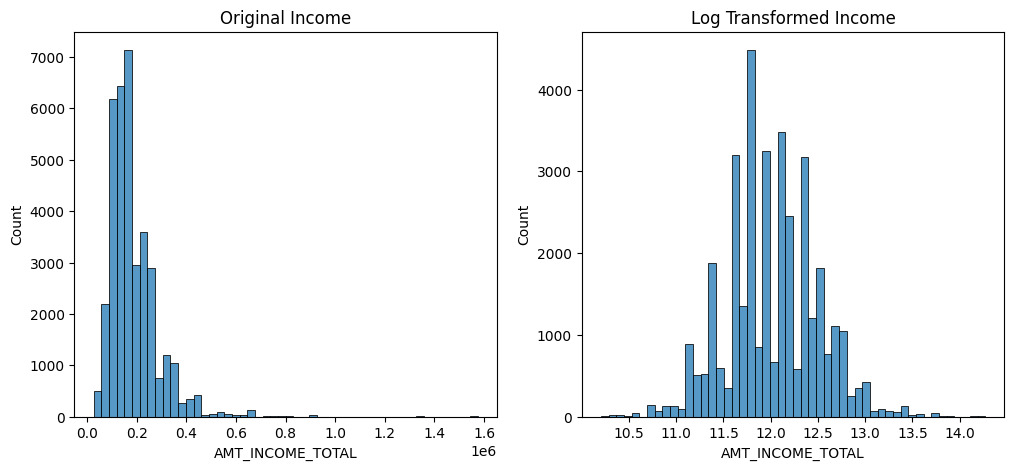

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_data['AMT_INCOME_TOTAL'], bins=50, ax=ax[0])
ax[0].set_title("Original Income")

sns.histplot(np.log1p(df_data['AMT_INCOME_TOTAL']), bins=50, ax=ax[1])
ax[1].set_title("Log Transformed Income")

plt.show()

In [ ]:
df_data["Income_per_person"] = df_data['AMT_INCOME_TOTAL']/ df_data["CNT_FAM_MEMBERS"]

In [ ]:
df_data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,Income_per_person
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,False,213750.0
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,False,213750.0
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,False,56250.0
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,False,270000.0
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,False,270000.0


In [ ]:
df_data.shape[0]

36457

In [ ]:
df_data["Target"].value_counts()

,count
Target,
False,36075
True,382


In [ ]:
df_data["Target"] = df_data["Target"].apply(lambda x: 1 if x else 0)

/tmp/ipython-input-1697532745.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_data.pivot_table(index='Income_Group',


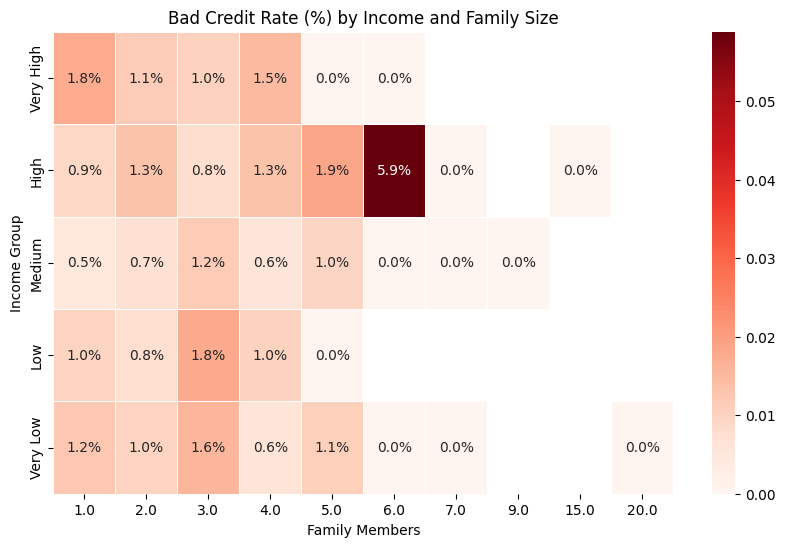

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_data['Income_Group'] = pd.qcut(df_data['AMT_INCOME_TOTAL'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

pivot_table = df_data.pivot_table(index='Income_Group',
                                  columns='CNT_FAM_MEMBERS',
                                  values='Target',
                                  aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1%', cmap='Reds', linewidths=.5)

plt.title('Bad Credit Rate (%) by Income and Family Size')
plt.xlabel('Family Members')
plt.ylabel('Income Group')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_data.pop("Income_Group")

,Income_Group
0,Very High
1,Very High
2,Very Low
3,Very High
4,Very High
...,...
36452,Very High
36453,Medium
36454,Medium
36455,Very High


In [ ]:
df_data[df_data["Target"] == 1]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,Income_per_person
64,N,Y,2,126000.0,Commercial associate,Higher education,Married,House / apartment,-12411,-1773,Managers,4.0,1,31500.0
111,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,Laborers,1.0,1,297000.0
241,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,-12197,-1194,Managers,3.0,1,255000.0
400,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,Laborers,1.0,1,193500.0
490,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19304,-464,Core staff,1.0,1,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36432,N,Y,0,306000.0,Pensioner,Higher education,Married,House / apartment,-21590,365243,NaN,2.0,1,153000.0
36437,N,Y,0,135000.0,Working,Secondary / secondary special,Widow,House / apartment,-14394,-919,Managers,1.0,1,135000.0
36449,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,-9847,-502,Core staff,3.0,1,150000.0
36452,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2.0,1,157500.0


In [ ]:
print(len(df_data[df_data["DAYS_EMPLOYED"] > 0]), len(df_data[df_data["DAYS_EMPLOYED"] == 365243]))

6135 6135


In [ ]:
df_data["DAYS_EMPLOYED"] = df_data["DAYS_EMPLOYED"].apply(lambda x: 0 if x == 365243 else x)
df_data["DAYS_BIRTH"] = df_data["DAYS_BIRTH"].apply(lambda x: 0 if x == 365243 else x)

In [ ]:
df_data["EMPLOYED_TO_AGE_RATIO"] = df_data['DAYS_EMPLOYED'] / df_data['DAYS_BIRTH']

In [ ]:
df_data.isnull().sum()

,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0


In [ ]:
df_data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,Income_per_person,EMPLOYED_TO_AGE_RATIO
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,0,213750.0,0.378342
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,0,213750.0,0.378342
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,0,56250.0,0.052808
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,0,270000.0,0.159655
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,0,270000.0,0.159655


In [ ]:
df_data["DAYS_BIRTH"] = df_data["DAYS_BIRTH"]//(-365)
df_data["DAYS_EMPLOYED"] = df_data["DAYS_EMPLOYED"]/(-365)

In [ ]:
df_data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,Income_per_person,EMPLOYED_TO_AGE_RATIO
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.443836,NaN,2.0,0,213750.0,0.378342
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.443836,NaN,2.0,0,213750.0,0.378342
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3.106849,Security staff,2.0,0,56250.0,0.052808
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.358904,Sales staff,1.0,0,270000.0,0.159655
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.358904,Sales staff,1.0,0,270000.0,0.159655


In [ ]:
df_data_train = df_data.copy()

In [ ]:
y = df_data_train.pop("Target")
x = df_data_train

In [ ]:
x.shape

(36457, 14)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np

In [ ]:
RAND_STATE=123

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=RAND_STATE, test_size=0.3)
ordinal_features = ["NAME_EDUCATION_TYPE"]
nominal_features = x.select_dtypes(include='object').columns.tolist()
nominal_features.remove("NAME_EDUCATION_TYPE")

mapping_education = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

In [ ]:
ordinal_enc = make_pipeline(
    OrdinalEncoder(categories=[mapping_education]),
)

nominal_enc = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder()
)

preprocess = ColumnTransformer([
    ("ord", ordinal_enc, ordinal_features),
    ("nom", nominal_enc, nominal_features)
], remainder="passthrough")


In [ ]:
x_train, x_validate, y_train, y_val = train_test_split(x_train,y_train,stratify=y_train, random_state=RAND_STATE, test_size=0.2)

# Start Finding best feature

In [ ]:
model_default = make_pipeline(
    preprocess,
    RandomForestClassifier(random_state=RAND_STATE, class_weight='balanced',max_depth=10, min_samples_split=20, max_features='sqrt', criterion='gini',
                           n_estimators=200, n_jobs=-1)
)

In [ ]:
print(x_train.shape, y_train.shape)

(16332, 14) (16332,)


In [ ]:
model_default.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Lower '
                                                                                               'secondary',
                                                                                               'Secondary '
                                                                                               '/ '
                                                                                               'secondary '
                                                                                               'special',
                                                                                               'Incomplete '
                                                                                               'higher',
                                                                                               'Higher '
                                                                                               'education',
                                                                                               'Academic '
                                                                                               'degree']]))]),
                                                  ['NAME_EDUCATION_TYPE']),
                                                 ('nom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=20, n_estimators=200,
                                        n_jobs=-1, random_state=123))])

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4040
           1       0.07      0.21      0.10        43

    accuracy                           0.96      4083
   macro avg       0.53      0.59      0.54      4083
weighted avg       0.98      0.96      0.97      4083



Text(50.722222222222214, 0.5, 'True labels')

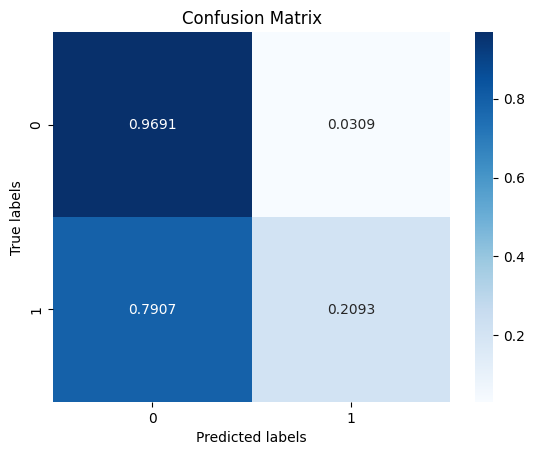

In [ ]:
pred = model_default.predict_proba(x_validate)[:,1]
pred = pred >= 0.5
print(classification_report(y_val, pred))
matrix = confusion_matrix(y_val, pred)
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(matrix, annot=True, fmt='.4f', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [ ]:
y_probs = model_default.predict_proba(x_validate)[:, 1]

thresholds = np.arange(0, 1.1, 0.05)
f1_results = []

for t in thresholds:
    pred_t = y_probs >= t
    score = f1_score(y_val, pred_t, pos_label=1)
    f1_results.append(score)

best_threshold = thresholds[np.argmax(f1_results)]
best_f1 = max(f1_results)

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-Score for Class 1: {best_f1:.4f}")

final_pred = y_probs >= best_threshold
print("\nFinal Classification Report with Optimal Threshold:")
print(classification_report(y_val, final_pred))

Best Threshold: 0.55
Best F1-Score for Class 1: 0.1471

Final Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4040
           1       0.20      0.12      0.15        43

    accuracy                           0.99      4083
   macro avg       0.60      0.56      0.57      4083
weighted avg       0.98      0.99      0.98      4083



Text(50.722222222222214, 0.5, 'True labels')

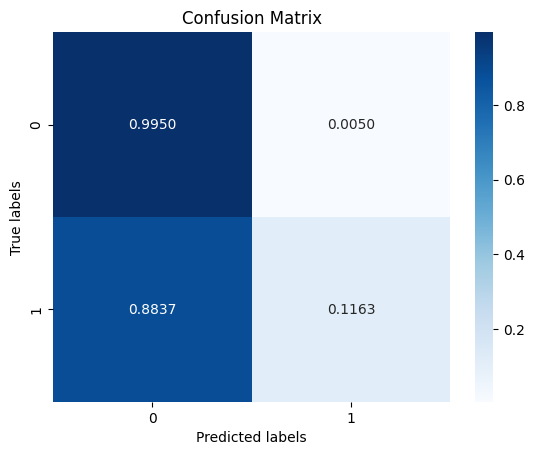

In [ ]:
pred = model_default.predict_proba(x_validate)[:,1]
pred = pred >= best_threshold
matrix = confusion_matrix(y_val, pred)
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(matrix, annot=True, fmt='.4f', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [ ]:
feature_imp = model_default[-1].feature_importances_
feature_imp

array([2.97516498e-02, 1.80077516e-02, 1.81178531e-02, 1.86643773e-02,
       1.96522930e-02, 1.73679445e-02, 6.03692804e-03, 1.18730013e-02,
       2.68598918e-06, 1.86146572e-02, 1.06807750e-02, 1.37352532e-02,
       1.16668998e-02, 1.13710997e-02, 5.01991194e-03, 2.17383073e-03,
       1.20106102e-02, 9.36601264e-03, 9.59524501e-04, 8.63743903e-03,
       6.86663709e-03, 1.29868196e-02, 4.33681952e-03, 3.81490272e-03,
       1.44755828e-02, 9.47605516e-03, 3.93044999e-03, 5.78177910e-03,
       1.37551237e-02, 1.40836883e-02, 5.89578413e-04, 1.53763535e-02,
       4.87822493e-03, 2.29865621e-03, 6.09089267e-03, 1.41562032e-02,
       4.55130302e-03, 4.57800741e-03, 1.52002749e-03, 2.29117044e-02,
       1.04203573e-01, 1.09552888e-01, 1.16501481e-01, 2.80203347e-02,
       1.20999803e-01, 1.10552613e-01])

In [ ]:
mean_per_feature = np.mean(feature_imp, axis=0)
mean_per_feature

np.float64(0.021739130434782608)

In [ ]:
cols_name = model_default[:-1].get_feature_names_out()
pass_cols = [cols_name[i] for i in range(len(cols_name)) if feature_imp[i] > 0.015]
print(pass_cols)
print(len(pass_cols))

['ord__NAME_EDUCATION_TYPE', 'nom__FLAG_OWN_CAR_N', 'nom__FLAG_OWN_CAR_Y', 'nom__FLAG_OWN_REALTY_N', 'nom__FLAG_OWN_REALTY_Y', 'nom__NAME_INCOME_TYPE_Commercial associate', 'nom__NAME_INCOME_TYPE_Working', 'nom__OCCUPATION_TYPE_Managers', 'remainder__CNT_CHILDREN', 'remainder__AMT_INCOME_TOTAL', 'remainder__DAYS_BIRTH', 'remainder__DAYS_EMPLOYED', 'remainder__CNT_FAM_MEMBERS', 'remainder__Income_per_person', 'remainder__EMPLOYED_TO_AGE_RATIO']
15


In [ ]:
df_next = df_data.copy()

In [ ]:
select_feature = ["DAYS_BIRTH", "DAYS_EMPLOYED", "FLAG_OWN_CAR", "NAME_INCOME_TYPE", "NAME_FAMILY_STATUS"
, "OCCUPATION_TYPE", "Target","Income_per_person","EMPLOYED_TO_AGE_RATIO","NAME_EDUCATION_TYPE","FLAG_OWN_REALTY", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "AMT_INCOME_TOTAL"]
remove_cols = [col for col in df_next.columns.tolist() if col not in select_feature]
remove_cols
len(select_feature)

14

In [ ]:
df_next.drop(remove_cols, axis=1, inplace=True)

In [ ]:
df_next.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,Income_per_person,EMPLOYED_TO_AGE_RATIO
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,32,12.443836,NaN,2.0,0,213750.0,0.378342
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,32,12.443836,NaN,2.0,0,213750.0,0.378342
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,58,3.106849,Security staff,2.0,0,56250.0,0.052808
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52,8.358904,Sales staff,1.0,0,270000.0,0.159655
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52,8.358904,Sales staff,1.0,0,270000.0,0.159655


In [ ]:
df_next.shape

(36457, 14)

In [ ]:
y = df_next.pop("Target")
x = df_next

In [ ]:
x.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Income_per_person,EMPLOYED_TO_AGE_RATIO
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,32,12.443836,NaN,2.0,213750.0,0.378342
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,32,12.443836,NaN,2.0,213750.0,0.378342
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,58,3.106849,Security staff,2.0,56250.0,0.052808
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52,8.358904,Sales staff,1.0,270000.0,0.159655
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52,8.358904,Sales staff,1.0,270000.0,0.159655


In [ ]:
nominal_features = x.select_dtypes(include='object').columns.tolist()
ordinal_features = []
print(nominal_features)
print(ordinal_features)
print(df_data.columns.tolist())
if "NAME_EDUCATION_TYPE" in select_feature:
  ordinal_features.append("NAME_EDUCATION_TYPE")
if "NAME_EDUCATION_TYPE" in nominal_features:
  nominal_features.remove("NAME_EDUCATION_TYPE")
preprocess = ColumnTransformer([
    ("ord", ordinal_enc, ordinal_features),
    ("nom", nominal_enc, nominal_features)
], remainder="passthrough")
model_default = make_pipeline(
    preprocess,
    RandomForestClassifier(random_state=RAND_STATE, class_weight='balanced',max_depth=10, min_samples_split=20, max_features='sqrt', criterion='gini',
                           n_estimators=200, n_jobs=-1)
)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
[]
['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Target', 'Income_per_person', 'EMPLOYED_TO_AGE_RATIO']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=RAND_STATE, test_size=0.3)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, stratify=y_train, random_state=RAND_STATE, test_size=0.2)

In [ ]:
model_default.fit(x_train, y_train)
pred = model_default.predict(x_validate)

Text(50.722222222222214, 0.5, 'True labels')

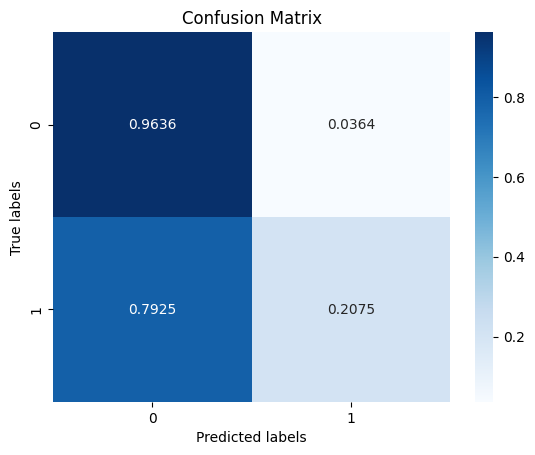

In [ ]:
matrix = confusion_matrix(y_validate, pred)
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(matrix, annot=True, fmt='.4f', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [ ]:
print(classification_report(y_validate, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5051
           1       0.06      0.21      0.09        53

    accuracy                           0.96      5104
   macro avg       0.52      0.59      0.53      5104
weighted avg       0.98      0.96      0.97      5104



# Star finding best parameter

In [ ]:
model_without_resample = make_pipeline(
    preprocess,
    RandomForestClassifier(random_state=RAND_STATE, class_weight='balanced')
)

model_with_resample = make_pipeline_imb(
    preprocess,
    SMOTE(),
    RandomForestClassifier(random_state=RAND_STATE, class_weight='balanced')
)

In [ ]:
params = {
    "randomforestclassifier__max_depth": [10, 20, 30],
    "randomforestclassifier__min_samples_split": [20, 50, 100],
    "randomforestclassifier__max_features": ["sqrt", "log2"]
}

In [ ]:
gs_wo_resample = RandomizedSearchCV(
    estimator=model_without_resample, param_distributions=params, cv=3, scoring="f1", n_jobs=-1, verbose=2, n_iter=20
)
gs_w_resample = RandomizedSearchCV(
    estimator=model_with_resample, param_distributions=params, cv=3, scoring="f1", n_jobs=-1, verbose=2, n_iter=20
)

In [ ]:
gs_wo_resample.fit(x_train, y_train)
gs_w_resample.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ord',
                                                                               Pipeline(steps=[('ordinalencoder',
                                                                                                OrdinalEncoder(categories=[['Lower '
                                                                                                                            'secondary',
                                                                                                                            'Secondary '
                                                                                                                            '/ '
                                                                                                                            'secondary '
                                                                                                                            'special',
                                                                                                                            'Incomplete '
                                                                                                                            'higher',
                                                                                                                            'Higher '
                                                                                                                            'education',
                                                                                                                            'Academic '
                                                                                                                            'degree']]))]),
                                                                               ['NAME_EDUCATION_TYPE']),
                                                                              ('nom',
                                                                               Pi...
                                                                                'OCCUPATION_TYPE'])])),
                                             ('smote', SMOTE()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=123))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [10,
                                                                              20,
                                                                              30],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__min_samples_split': [20,
                                                                                      50,
                                                                                      100]},
                   scoring='f1', verbose=2)

In [ ]:
print(gs_wo_resample.best_params_)
print(gs_w_resample.best_params_)

{'randomforestclassifier__min_samples_split': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 30}
{'randomforestclassifier__min_samples_split': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 30}


In [ ]:
predict_result_1 = gs_wo_resample.predict(x_validate)
predict_result_2 = gs_w_resample.predict(x_validate)

In [ ]:
best_pipeline_wo = gs_wo_resample.best_estimator_
best_pipeline_w = gs_w_resample.best_estimator_

print("Without Resample:")
print(best_pipeline_wo[-1].feature_importances_)

print("\nWith Resample:")
print(best_pipeline_w[-1].feature_importances_)

Without Resample:
[3.46333561e-02 1.77715803e-02 1.95918666e-02 1.96642542e-02
 1.64333747e-02 1.72606754e-02 4.77196417e-03 1.07721960e-02
 2.87854224e-06 1.79509876e-02 1.36375576e-02 1.67337805e-02
 8.54755158e-03 9.90619513e-03 5.78374952e-03 6.79885259e-03
 2.45440356e-03 6.51478062e-03 1.30420927e-02 9.61161172e-03
 1.76599988e-03 5.93666695e-03 3.20502572e-03 1.79165402e-02
 1.15364237e-03 1.13669133e-02 4.46324519e-03 2.33038168e-03
 2.23425680e-03 1.17541134e-02 2.24797223e-03 4.22038754e-03
 8.76010222e-04 2.21621153e-02 1.19468701e-01 1.34860508e-01
 1.24657714e-01 2.75129228e-02 1.29342695e-01 1.20640480e-01]

With Resample:
[7.50657046e-02 7.00490372e-02 5.72207712e-02 6.27674015e-02
 7.60985242e-02 5.03433170e-02 2.88375966e-02 1.68326131e-02
 1.51697638e-05 5.87070335e-02 1.50148958e-02 2.19636015e-02
 1.08124128e-02 1.43340364e-02 6.32607214e-03 3.49835769e-03
 1.64742240e-03 9.35083415e-03 1.57700743e-02 1.18457262e-02
 1.43545189e-03 6.62903732e-03 5.49144890e-03 8.81

In [ ]:
mean_per_feature = np.mean(best_pipeline_wo[-1].feature_importances_, axis=0)

Text(50.722222222222214, 0.5, 'True labels')

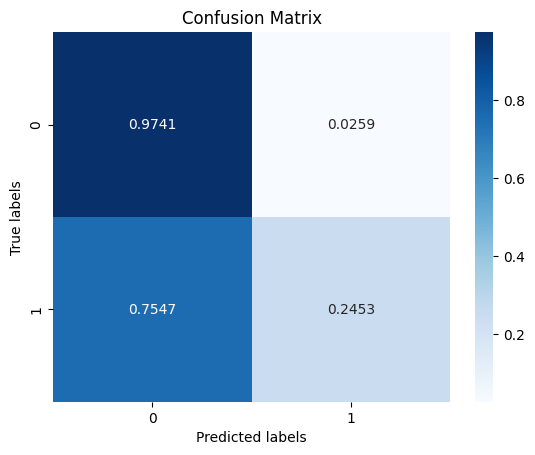

In [ ]:
matrix = confusion_matrix(y_validate, predict_result_1)
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(matrix, annot=True, fmt='.4f', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(50.722222222222214, 0.5, 'True labels')

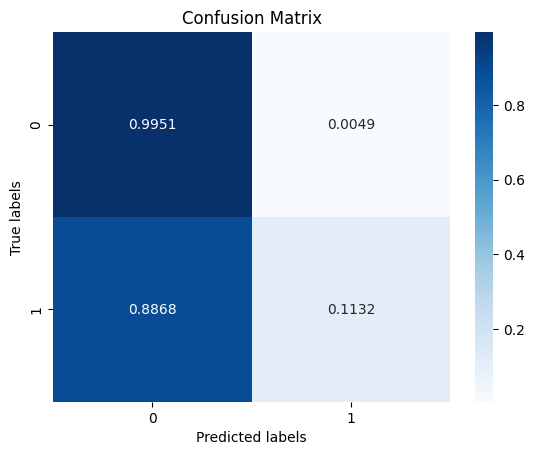

In [ ]:
matrix = confusion_matrix(y_validate, predict_result_2)
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(matrix, annot=True, fmt='.4f', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [ ]:
print(classification_report(y_validate, predict_result_1))
print(classification_report(y_validate, predict_result_2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5051
           1       0.09      0.25      0.13        53

    accuracy                           0.97      5104
   macro avg       0.54      0.61      0.56      5104
weighted avg       0.98      0.97      0.97      5104

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5051
           1       0.19      0.11      0.14        53

    accuracy                           0.99      5104
   macro avg       0.59      0.55      0.57      5104
weighted avg       0.98      0.99      0.98      5104



Text(0.5, 1.0, 'Model with out resample')

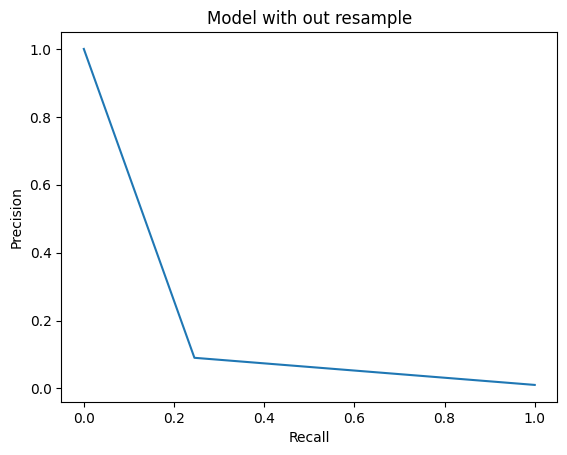

In [ ]:
precission, recall, _ = precision_recall_curve(y_validate, predict_result_1)
plt.plot(recall, precission)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Model with out resample")

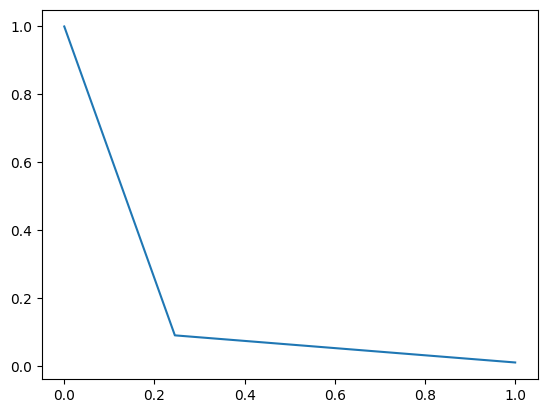

In [ ]:
plt.plot(recall, precission)

Text(0.5, 1.0, 'Model with resample')

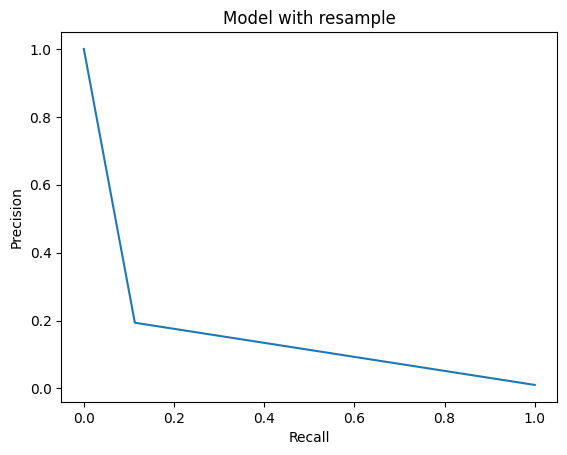

In [ ]:
precission, recall, _ = precision_recall_curve(y_validate, predict_result_2)
plt.plot(recall, precission)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Model with resample")

In [ ]:
plt.plot(recall, precission)